In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn.preprocessing as pre
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
import os
os.getcwd()

'C:\\Users\\USER'

In [3]:
os.chdir('C:\\Users\\USER\\Documents\\python_works')

In [4]:
df = pd.read_csv('HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# **EDA SECTION**

In [7]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
num_col = ['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company']
cat_col = ['Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']

In [9]:
len(num_col), len(cat_col)

(5, 5)

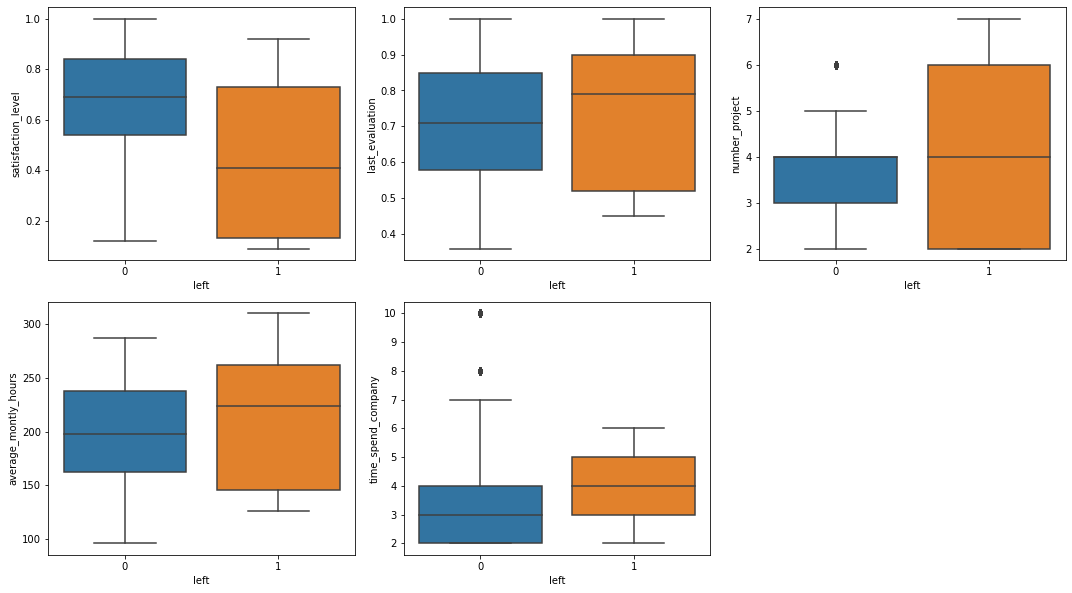

In [10]:
plt.figure(figsize = (15,12))
for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y= df[num_col[i]], x = df.left)
plt.tight_layout()
plt.show()

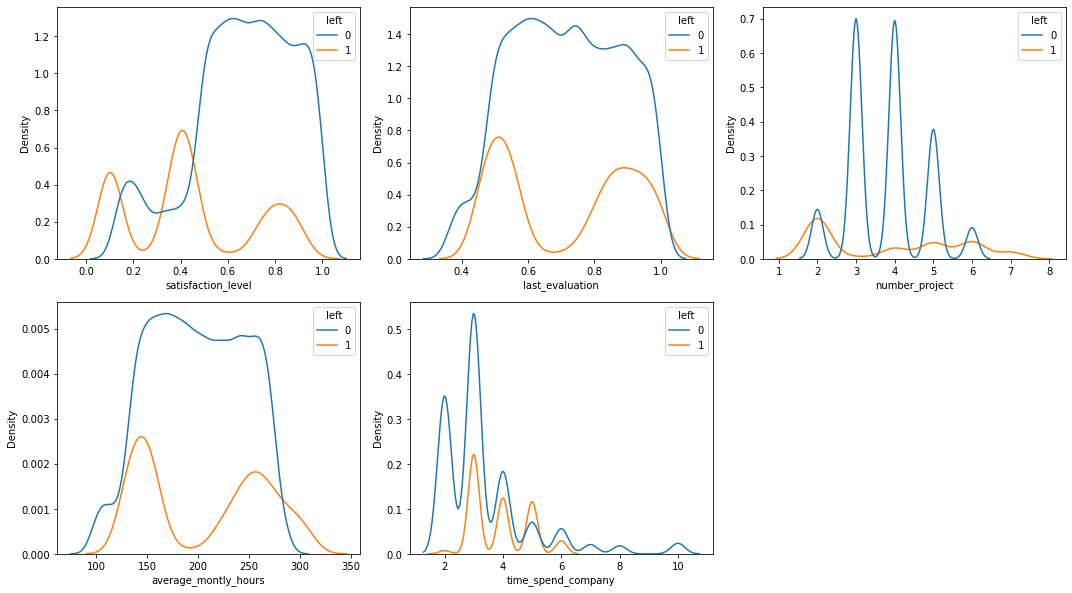

In [11]:
plt.figure(figsize = (15,12))
for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(df[num_col[i]], hue = df.left)
plt.tight_layout()
plt.show()

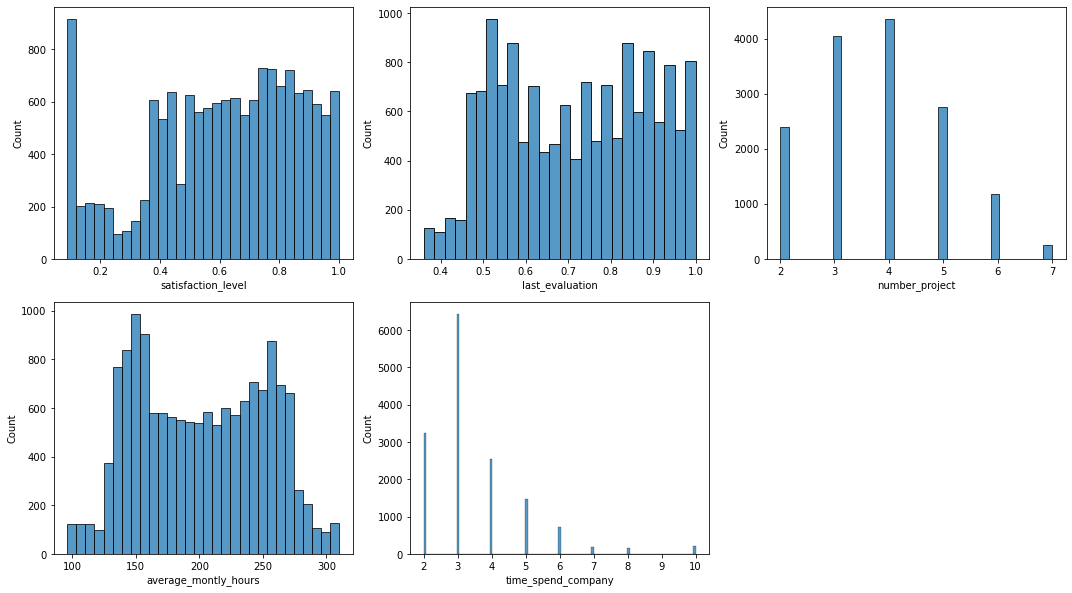

In [12]:
plt.figure(figsize = (15,12))
for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    sns.histplot(df[num_col[i]])
plt.tight_layout()
plt.show()

In [13]:
cat_col

['Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']

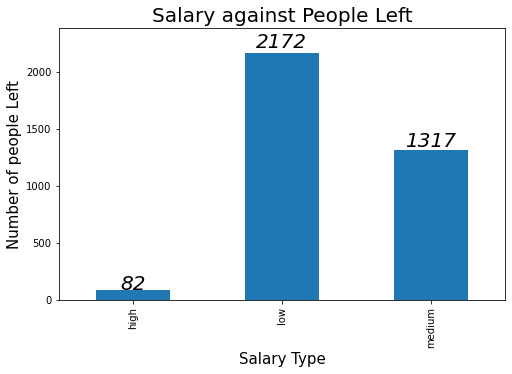

In [14]:
plt.figure(figsize =(8,5))
ab = df.groupby('salary')['left'].sum()
cm = ab.plot(kind = 'bar')
plt.ylabel('Number of people Left', fontsize = 15)
plt.xlabel('Salary Type', fontsize = 15)
plt.title('Salary against People Left', fontsize = 20)
for i,v in enumerate(ab):
    cm.annotate(str(v), xy = (i, v*1.02), ha = 'center' ,fontsize = 20, fontstyle = 'italic')
plt.ylim(0,ab.max()*1.1)
plt.show()

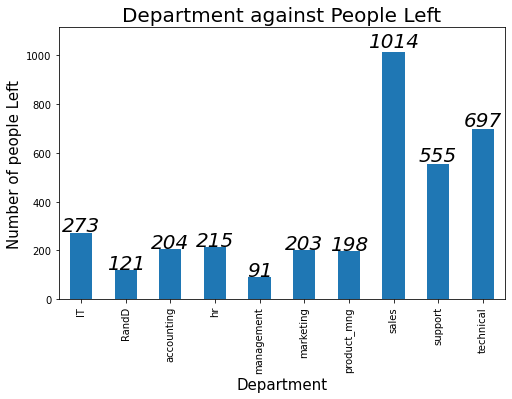

In [15]:
plt.figure(figsize =(8,5))
ab = df.groupby('Department')['left'].sum()
cm = ab.plot(kind = 'bar')
plt.ylabel('Number of people Left', fontsize = 15)
plt.xlabel('Department', fontsize = 15)
plt.title('Department against People Left', fontsize = 20)
for i,v in enumerate(ab):
    cm.annotate(str(v), xy = (i, v*1.02), ha = 'center' ,fontsize = 20, fontstyle = 'italic')
plt.ylim(0,ab.max()*1.1)
plt.show()

<AxesSubplot:xlabel='Department', ylabel='count'>

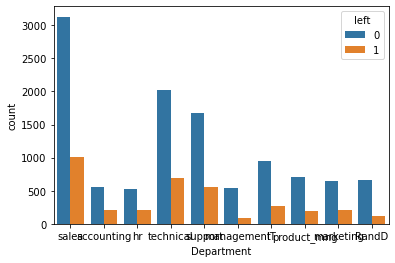

In [16]:
sns.countplot(df.Department, hue = df.left)

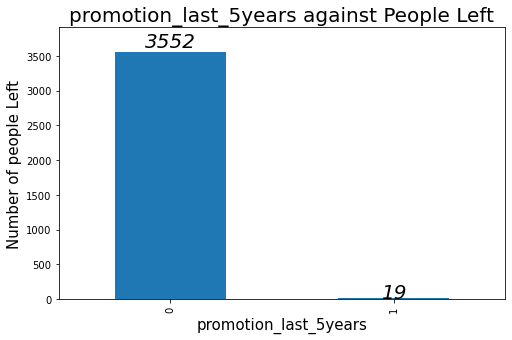

In [17]:
plt.figure(figsize =(8,5))
ab = df.groupby('promotion_last_5years')['left'].sum()
cm = ab.plot(kind = 'bar')
plt.ylabel('Number of people Left', fontsize = 15)
plt.xlabel('promotion_last_5years', fontsize = 15)
plt.title('promotion_last_5years against People Left', fontsize = 20)
for i,v in enumerate(ab):
    cm.annotate(str(v), xy = (i, v*1.02), ha = 'center' ,fontsize = 20, fontstyle = 'italic')
plt.ylim(0,ab.max()*1.1)
plt.show()

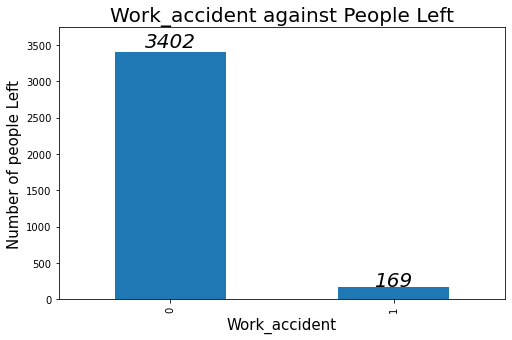

In [18]:
plt.figure(figsize =(8,5))
ab = df.groupby('Work_accident')['left'].sum()
cm = ab.plot(kind = 'bar')
plt.ylabel('Number of people Left', fontsize = 15)
plt.xlabel('Work_accident', fontsize = 15)
plt.title('Work_accident against People Left', fontsize = 20)
for i,v in enumerate(ab):
    cm.annotate(str(v), xy = (i, v*1.02), ha = 'center' ,fontsize = 20, fontstyle = 'italic')
plt.ylim(0,ab.max()*1.1)
plt.show()

In [19]:
df = pd.get_dummies(df, drop_first = 'True' )

In [20]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [21]:
df['left_'] = df['left']

In [22]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,left_
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1


In [23]:
df.drop('left', axis = 1, inplace = True)

In [24]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,left_
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [25]:
df.rename(columns = {'left_': 'left'}, inplace = True)

In [26]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,left
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,1,0,1,0,1


<AxesSubplot:>

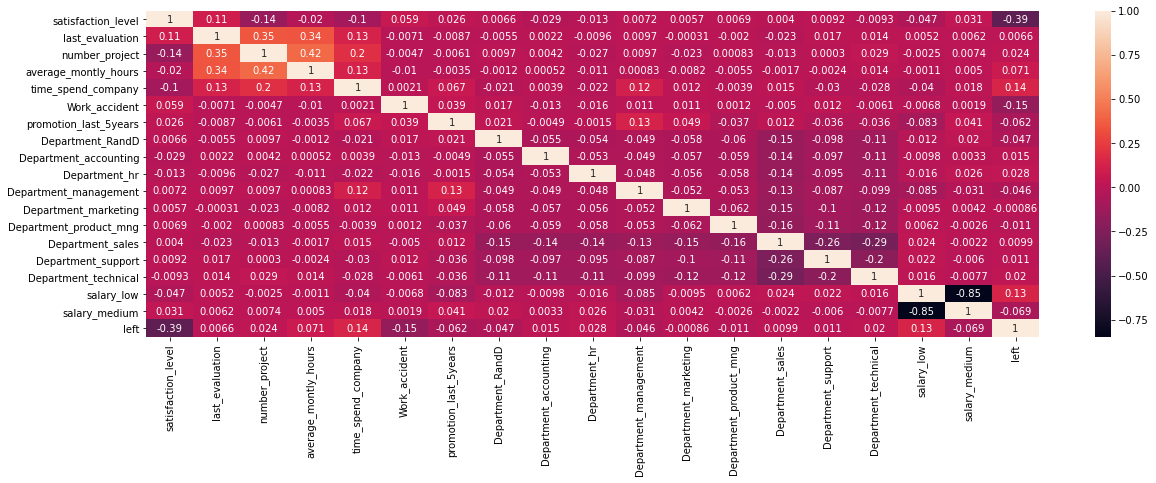

In [27]:
plt.figure(figsize = (20,6))
sns.heatmap(df.corr(), annot = True)

In [28]:
# columns to be dropped
#'last_evaluation', 'number_project'

In [29]:
new_df = df.drop(['last_evaluation', 'number_project'], axis = 1)

In [30]:
new_df

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,left
0,0.38,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0.80,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0.11,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,0.72,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0.37,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
14995,0.37,160,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
14996,0.37,143,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
14997,0.11,280,4,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [31]:
new_df_1 = new_df.drop(['Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'Department_technical'], axis = 1)

In [32]:
new_df_1

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_low,salary_medium,left
0,0.38,157,3,0,0,1,0,1
1,0.80,262,6,0,0,0,1,1
2,0.11,272,4,0,0,0,1,1
3,0.72,223,5,0,0,1,0,1
4,0.37,159,3,0,0,1,0,1
...,...,...,...,...,...,...,...,...
14994,0.40,151,3,0,0,1,0,1
14995,0.37,160,3,0,0,1,0,1
14996,0.37,143,3,0,0,1,0,1
14997,0.11,280,4,0,0,1,0,1


# Building KNN algorithm on the three datasets

In [33]:
scaler = pre.StandardScaler()

In [34]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,left
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,1,0,1,0,1
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [35]:
for i in range(len(df.columns)):
    if i < len(df.columns)-1:
        df[df.columns[i]] = scaler.fit_transform(df[[df.columns[i]]])

In [36]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,left
0,-0.936495,-1.087275,-1.462863,-0.882040,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,1.024775,-0.868132,1
1,0.752814,0.840707,0.971113,1.220423,1.713436,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.975824,1.151898,1
2,-2.022479,0.957554,2.593763,1.420657,0.343655,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.975824,1.151898,1
3,0.431041,0.899131,0.971113,0.439508,1.028546,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,1.024775,-0.868132,1
4,-0.976716,-1.145699,-1.462863,-0.841993,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,1.024775,-0.868132,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-0.853580,-1.462863,-1.002181,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655,1.024775,-0.868132,1
14995,-0.976716,-1.379394,-1.462863,-0.821970,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655,1.024775,-0.868132,1
14996,-0.976716,-1.087275,-1.462863,-1.162368,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655,1.024775,-0.868132,1
14997,-2.022479,1.424944,1.782438,1.580845,0.343655,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655,1.024775,-0.868132,1


In [37]:
x = df.drop('left', axis = 1)
y = df.left

In [38]:
knn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute')
knn.fit(x,y)

In [39]:
parameter = dict(n_neighbors = list(range(5,50,2)), algorithm = list(['auto', 'brute']))
grid = GridSearchCV(knn, parameter, cv = 10, scoring = 'f1')

In [40]:
print(parameter)

{'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49], 'algorithm': ['auto', 'brute']}


In [41]:
grid.fit(x,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(algorithm='brute'),
             param_grid={'algorithm': ['auto', 'brute'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49]},
             scoring='f1')

In [43]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [44]:
print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 7}


In [45]:
print(grid.best_score_)

0.883189468960626


## Defining function to determine the best data for the algorithm

The data are  
df  
new_df  
new_df_1

In [46]:
for i in range(len(new_df.columns)):
    if i < len(new_df.columns)-1:
        new_df[new_df.columns[i]] = scaler.fit_transform(new_df[[new_df.columns[i]]])

In [47]:
new_df

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,left
0,-0.936495,-0.882040,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,1.024775,-0.868132,1
1,0.752814,1.220423,1.713436,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.975824,1.151898,1
2,-2.022479,1.420657,0.343655,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,-0.975824,1.151898,1
3,0.431041,0.439508,1.028546,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,1.024775,-0.868132,1
4,-0.976716,-0.841993,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,1.619551,-0.417791,-0.470655,1.024775,-0.868132,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,-0.856051,-1.002181,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655,1.024775,-0.868132,1
14995,-0.976716,-0.821970,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655,1.024775,-0.868132,1
14996,-0.976716,-1.162368,-0.341235,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655,1.024775,-0.868132,1
14997,-2.022479,1.580845,0.343655,-0.411165,-0.147412,-0.235321,-0.232148,-0.227647,-0.209391,-0.246322,-0.252953,-0.617455,2.393538,-0.470655,1.024775,-0.868132,1


In [48]:
for i in range(len(new_df_1.columns)):
    if i < len(new_df_1.columns)-1:
        new_df_1[new_df_1.columns[i]] = scaler.fit_transform(new_df_1[[new_df_1.columns[i]]])

In [49]:
new_df_1

,satisfaction_level,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_low,salary_medium,left
0,-0.936495,-0.882040,-0.341235,-0.411165,-0.147412,1.024775,-0.868132,1
1,0.752814,1.220423,1.713436,-0.411165,-0.147412,-0.975824,1.151898,1
2,-2.022479,1.420657,0.343655,-0.411165,-0.147412,-0.975824,1.151898,1
3,0.431041,0.439508,1.028546,-0.411165,-0.147412,1.024775,-0.868132,1
4,-0.976716,-0.841993,-0.341235,-0.411165,-0.147412,1.024775,-0.868132,1
...,...,...,...,...,...,...,...,...
14994,-0.856051,-1.002181,-0.341235,-0.411165,-0.147412,1.024775,-0.868132,1
14995,-0.976716,-0.821970,-0.341235,-0.411165,-0.147412,1.024775,-0.868132,1
14996,-0.976716,-1.162368,-0.341235,-0.411165,-0.147412,1.024775,-0.868132,1
14997,-2.022479,1.580845,0.343655,-0.411165,-0.147412,1.024775,-0.868132,1


In [57]:
def avarage_accuracy(data, model):
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=12)
    accuracy = []
    
    x = data.drop('left', axis =1)
    y = data.left
    
    for train_index, test_index in skf.split(x,y):
        X_train, X_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        #print(confusion_matrix(y_test, y_pred))
        accuracy.append(model.score(X_train, y_train))
        print([round(model.score(X_train, y_train),2)])
    accuracy = sum(accuracy)/len(accuracy)
    return accuracy
        
knn = KNeighborsClassifier(n_neighbors=7, algorithm='auto',)
avarage_accuracy(df, knn)
#avarage_accuracy(new_df, knn)
#avarage_accuracy(new_df_1, knn)    

[0.95]
[0.95]
[0.95]
[0.95]
[0.95]
[0.95]
[0.96]
[0.95]
[0.95]
[0.95]


0.9536043048456264

In [58]:
avarage_accuracy(new_df, knn)

[0.95]
[0.95]
[0.95]
[0.95]
[0.95]
[0.95]
[0.95]
[0.95]
[0.95]
[0.95]


0.9481965550260236

In [59]:
avarage_accuracy(new_df_1, knn)

[0.97]
[0.97]
[0.97]
[0.97]
[0.97]
[0.97]
[0.97]
[0.97]
[0.97]
[0.97]


0.9663533161578499